<a href="https://colab.research.google.com/github/Sukanya41455/Heart-Diseases-Prediction/blob/main/Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files 
  
  
uploaded = files.upload()

Saving cleveland.csv to cleveland.csv


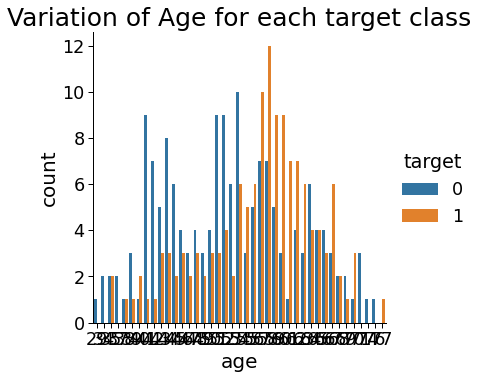

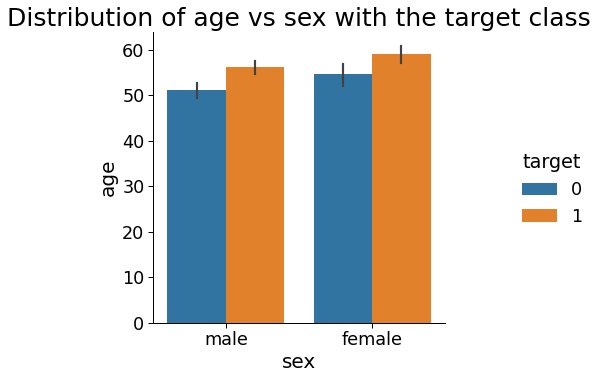


Accuracy for training set for svm = 0.933920704845815
Accuracy for test set for svm = 0.8157894736842105

Accuracy for training set for Naive Bayes = 0.8678414096916299
Accuracy for test set for Naive Bayes = 0.8157894736842105

Accuracy for training set for Logistic Regression = 0.8722466960352423
Accuracy for test set for Logistic Regression = 0.8026315789473685


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)



Accuracy for training set for Decision Tree = 1.0
Accuracy for test set for Decision Tree = 0.7368421052631579

Accuracy for training set for Random Forest = 0.986784140969163
Accuracy for test set for Random Forest = 0.7236842105263158

Accuracy for training set for LightGBM = 0.986784140969163
Accuracy for test set for LightGBM = 0.7236842105263158

Accuracy for training set for XGBoost = 0.986784140969163
Accuracy for test set for XGBoost = 0.7631578947368421


In [2]:
import pandas as pd
import io 
  
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category = FutureWarning)
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category = FutureWarning)
 
 
df = pd.read_csv(io.BytesIO(uploaded['cleveland.csv']), header = None)
 
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol',
              'fbs', 'restecg', 'thalach', 'exang', 
              'oldpeak', 'slope', 'ca', 'thal', 'target']
 
### 1 = male, 0 = female
df.isnull().sum()
 
df['target'] = df.target.map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})
df['sex'] = df.sex.map({0: 'female', 1: 'male'})
df['thal'] = df.thal.fillna(df.thal.mean())
df['ca'] = df.ca.fillna(df.ca.mean())
 
import matplotlib.pyplot as plt
import seaborn as sns
 
# distribution of target vs age 
sns.set_context("paper", font_scale = 2, rc = {"font.size": 20,"axes.titlesize": 25,"axes.labelsize": 20}) 
sns.catplot(kind = 'count', data = df, x = 'age', hue = 'target', order = df['age'].sort_values().unique())
plt.title('Variation of Age for each target class')
plt.show()
 
 
# barplot of age vs sex with hue = target
sns.catplot(kind = 'bar', data = df, y = 'age', x = 'sex', hue = 'target')
plt.title('Distribution of age vs sex with the target class')
plt.show()
 
df['sex'] = df.sex.map({'female': 0, 'male': 1})
 
 
################################## data preprocessing
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
 
from sklearn.preprocessing import StandardScaler as ss
sc = ss()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
 
#########################################   SVM   #############################################################
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf')
classifier.fit(X_train, y_train)
 
# Predicting the Test set results
y_pred = classifier.predict(X_test)
 
from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)
 
y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)
 
print()
print('Accuracy for training set for svm = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for svm = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))
 
 
#########################################   Naive Bayes  #############################################################
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
 
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)
 
 
# Predicting the Test set results
y_pred = classifier.predict(X_test)
 
from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)
 
y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)
 
print()
print('Accuracy for training set for Naive Bayes = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for Naive Bayes = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))
 
 
#########################################   Logistic Regression  #############################################################
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
 
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
 
# Predicting the Test set results
y_pred = classifier.predict(X_test)
 
from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)
 
y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)
 
print()
print('Accuracy for training set for Logistic Regression = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for Logistic Regression = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))
 
#########################################   Decision Tree  #############################################################
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
 
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)
 
# Predicting the Test set results
y_pred = classifier.predict(X_test)
 
from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)
 
y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)
 
print()
print('Accuracy for training set for Decision Tree = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for Decision Tree = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))
 
 
#########################################  Random Forest  #############################################################
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
 
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10)
classifier.fit(X_train, y_train)
 
# Predicting the Test set results
y_pred = classifier.predict(X_test)
 
from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)
 
y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)
 
print()
print('Accuracy for training set for Random Forest = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for Random Forest = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))
 
###############################################################################
# applying lightGBM
import lightgbm as lgb
 
d_train = lgb.Dataset(X_train, label = y_train)
params = {}
 
clf = lgb.train(params, d_train, 100)
#Prediction
y_pred = clf.predict(X_test)
#convert into binary values
for i in range(0, len(y_pred)):
    if y_pred[i]>= 0.5:       # setting threshold to .5
       y_pred[i]=1
    else:  
       y_pred[i]=0
       
from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)
 
y_pred_train = clf.predict(X_train)
 
for i in range(0, len(y_pred_train)):
    if y_pred_train[i]>= 0.5:       # setting threshold to .5
       y_pred_train[i]=1
    else:  
       y_pred_train[i]=0
       
cm_train = confusion_matrix(y_pred_train, y_train)
print()
print('Accuracy for training set for LightGBM = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for LightGBM = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))
 
 
###############################################################################
# applying XGBoost
 
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, target, test_size = 0.20, random_state = 0)
 
from xgboost import XGBClassifier
xg = XGBClassifier()
xg.fit(X_train, y_train)
y_pred = xg.predict(X_test)
 
from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)
 
y_pred_train = xg.predict(X_train)
 
for i in range(0, len(y_pred_train)):
    if y_pred_train[i]>= 0.5:       # setting threshold to .5
       y_pred_train[i]=1
    else:  
       y_pred_train[i]=0
       
cm_train = confusion_matrix(y_pred_train, y_train)
print()
print('Accuracy for training set for XGBoost = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for XGBoost = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))